In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import Dependencies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# import Data
vgd_df = pd.read_csv(r"E:\final\Temp_database.csv")


In [5]:
# Drop the non-beneficial
vgd_df.drop(['Publisher'], axis=1, inplace=True)

In [6]:
# Combine Global and rest of world 
vgd_df['other countries'] = vgd_df['Rest of World'] + vgd_df['Global']



In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
vgd_df.drop(['Global','Rest of World'], axis=1, inplace=True)

In [8]:
vgd_df.head()

,Game,Platform,Year,Genre,North America,Europe,Japan,other countries
0,Grand Theft Auto V,PS4,2014.0,Action,6.06,9.71,0.60,22.41
1,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.18,6.05,0.41,17.53
2,Red Dead Redemption 2,PS4,2018.0,Action,5.26,6.21,0.21,16.20
3,Call of Duty: WWII,PS4,2017.0,Shooter,4.67,6.21,0.40,15.52
4,FIFA 18,PS4,2017.0,Sports,1.27,8.64,0.15,13.53


In [ ]:
# Description of preliminary data preprocessing 
# Description of preliminary feature engineering and preliminary feature selection, including their decision-making process
# Description of how data was split into training and testing sets 
# Explanation of model choice, including limitations and benefits


In [39]:
X = vgd_df['Genre']
y = vgd_df['North America']

In [40]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Adventure,Battle royale,MMO,Misc,Party,Racing,Role-Playing,Sandbox,Shooter,Simulation,Sports,Strategy,Survival,building
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [61]:
X_train.head()


,Adventure,Battle royale,MMO,Misc,Party,Racing,Role-Playing,Sandbox,Shooter,Simulation,Sports,Strategy,Survival,building
408,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1832,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2067,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1741,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1637,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
y_train.head()


408     0.07
1832    0.06
2067    0.00
1741    0.07
1637    0.06
Name: North America, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1693, 14)
(1130, 14)
(1693,)
(1130,)


In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
# print the intercept
print(model.intercept_)

0.31631687242798323


In [46]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Adventure,5.774631e-03
Battle royale,2.118368e+01
MMO,3.486831e-01
Misc,-2.215828e-01
Party,-8.881784e-15
Racing,-2.375669e-01
Role-Playing,-9.834141e-02
Sandbox,2.618368e+01
Shooter,2.230196e-01
Simulation,1.873022e-01


In [47]:
predictions = model.predict(X_test)
predictions

array([0.21797546, 0.31631687, 0.15111888, ..., 0.07875   , 0.31631687,
       0.31631687])

<AxesSubplot:xlabel='North America'>

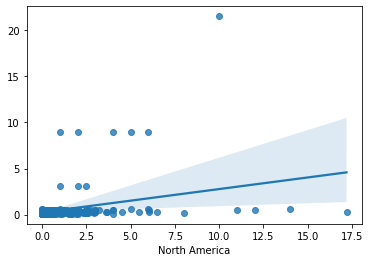

In [48]:
sns.regplot(y_test,predictions)

In [49]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:          North America   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.15e-239
Time:                        17:25:53   Log-Likelihood:                -2713.2
No. Observations:                1693   AIC:                             5454.
Df Residuals:                    1679   BIC:                             5531.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3163      0.055      5.779